<a href="https://colab.research.google.com/github/netgvarun2021/Blackbox/blob/main/TextifyProofReading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [128]:
import os
import pandas as pd
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from google.colab import drive

In [129]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [130]:
imdb_dir = '/content/gdrive/MyDrive'
dataset_dir = os.path.join(imdb_dir, 'Textify.ai/Textify AI Text Corpus Center (Responses).xlsx')
print(dataset_dir)

/content/gdrive/MyDrive/Textify.ai/Textify AI Text Corpus Center (Responses).xlsx


In [131]:
df = pd.read_excel(dataset_dir)

In [132]:
df.shape

(734, 11)

In [133]:
nlp = spacy.load('en_core_web_sm')


In [134]:
df[:1]['Essay Text'].values[0]

'THE ALARM CLOCK IS, TO MANY high school students, a wailing monstrosity whose purpose is to torture all who are sleep-deprived. Those who believe this are misguided, and are simply viewing the situation from a twisted perspective. For when these imprudent early-risers blearily rub their eyes each morning, and search in vain for whatever is making that earsplitting noise, they are, without a doubt, annoyed. Why? \nIt isn’t because the only thing they desire is to sleep a few extra hours, as many would presume. no, these kids are groggy and irritable because they are waking up to what they think will be another horribly boring day of school. If one of these foolish Sallys or Joes were, say, sleeping comfortably on a Saturday morning, I could certainly see something different happening. A beautiful breakfast of tantalizing vittles—eggs, hash browns, and the like—would be ready and waiting for them on their kitchen tables. But the scrumptious delight to outshine them all would be a slab o

In [135]:
# Create a simple Doc object
doc = nlp(df[:1]['Essay Text'].values[0])

In [136]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

THE        DET     det     determiner
ALARM      PROPN   compound compound
CLOCK      PROPN   nsubj   nominal subject
IS         VERB    ROOT    None
,          PUNCT   punct   punctuation
TO         ADP     prep    prepositional modifier
MANY       ADJ     amod    adjectival modifier
high       ADJ     amod    adjectival modifier
school     NOUN    compound compound
students   NOUN    pobj    object of preposition
,          PUNCT   punct   punctuation
a          DET     det     determiner
wailing    VERB    amod    adjectival modifier
monstrosity NOUN    appos   appositional modifier
whose      DET     poss    possession modifier
purpose    NOUN    nsubj   nominal subject
is         AUX     relcl   relative clause modifier
to         PART    aux     auxiliary
torture    VERB    xcomp   open clausal complement
all        DET     dobj    direct object
who        PRON    nsubj   nominal subject
are        AUX     relcl   relative clause modifier
sleep      NOUN    dep     unclassified d

In [137]:
df_essays = df['Essay Text'].to_frame()

In [138]:
df_essays.head()

,Essay Text
0,"THE ALARM CLOCK IS, TO MANY high school studen..."
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ..."
3,"THIS SUMMER, I WENT TO THE governor’s Honors P..."
4,THIS PAST SUMMER I HAD THE opportunity to part...


In [141]:
#df_essays_mini = df_essays[:3]

In [142]:
#df_essays_mini

# **FEATURE EXTRACTION FROM ESSAY'S ASCII TEST**

## **COUNTING SENTENCES**

In [143]:
def count_sentences(essay):
  doc = nlp(essay)
  doc_sents = [sent for sent in doc.sents]
  return len(doc_sents)


In [144]:
df_essays['SentenceCount'] = df_essays['Essay Text'].apply(count_sentences)

In [145]:
df_essays[:10]

,Essay Text,SentenceCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20
4,THIS PAST SUMMER I HAD THE opportunity to part...,23
5,"My eyes widen. “It’s all Greek to me,” I whisp...",46
6,"I could still hear her words, the words my tea...",31
7,It was a wet and dreary October evening. I sho...,30
8,"Oreos. On the exterior, a firm chocolate crust...",43
9,"Whether I was blowing out candles, writing a l...",21


In [146]:
df_essays.iloc[729].values[0]

'As a Chemistry student in Singapore Polytechnic, we had to conduct weekly experiments. Most of them had to be done with lab instruments such as Universal Testing Machine, Scanning Electron Microscopy (SEM). Software is essential as it is how we interact with the equipment and it is how we obtain our results. Good software ensures that the end user should not have to deal with bugs or issues that might jeopardise the results. It also makes our lives much more efficient and convenient as we could alter the experiment parameters through software without manually adjusting the measuring instrument.\nDuring my internship and National Service, I had other experiences where software greatly impacted my work. As a Data Analyst in Clariant, I assisted my supervisor with the manufacturing digitisation process where we converted all analog tasks to being fully digital and helped convert and prepare the data so that it may be presentable. I was an Admin Support Assistant during National Service, 

## **COUNTING WORDS w/o STOP WORDS**

In [147]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [148]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [149]:
word_tokens = word_tokenize(df_essays.iloc[729].values[0])
stop_words = set(stopwords.words('english'))

In [150]:
def count_non_stop_words(essay):
  word_tokens = word_tokenize(essay)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return len(filtered_sentence)


In [151]:
df_essays['WordCount'] = df_essays['Essay Text'].apply(count_non_stop_words)

In [152]:
df_essays.head()

,Essay Text,SentenceCount,WordCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35,462
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28,309
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40,532
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20,308
4,THIS PAST SUMMER I HAD THE opportunity to part...,23,320


## **COUNTING PARTS OF SPEECH**

In [153]:
def count_verb(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'VERB':
      return v

def count_noun(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'NOUN':
      return v

def count_adjective(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'ADJ':
      return v   

def count_adverb(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'ADV':
      return v    

def count_pronoun(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'PRON':
      return v  

def count_punctuations(essay):
  doc=nlp(essay)
  pos_counts = doc.count_by(spacy.attrs.POS)
  for k,v in sorted(pos_counts.items()):
    if doc.vocab[k] == 'PUNCT':
      return v                        

In [154]:
df_essays['VerbCount'] = df_essays['Essay Text'].apply(count_verb)
df_essays['NounCount'] = df_essays['Essay Text'].apply(count_noun)
df_essays['AdjCount'] = df_essays['Essay Text'].apply(count_adjective)
df_essays['AdverbCount'] = df_essays['Essay Text'].apply(count_adverb)
df_essays['PronounCount'] = df_essays['Essay Text'].apply(count_pronoun)
df_essays['PunctCount'] = df_essays['Essay Text'].apply(count_punctuations)


In [155]:
df_essays.head()

,Essay Text,SentenceCount,WordCount,VerbCount,NounCount,AdjCount,AdverbCount,PronounCount,PunctCount
0,"THE ALARM CLOCK IS, TO MANY high school studen...",35,462,102,142,70,46,46,101
1,I HAVE ALWAYS BEEN A MATH-SCIENCE girl. I sigh...,28,309,75,113,45,30,46,53
2,"WHEN I WAS FOUR YEARS OLD, I fell in love. It ...",40,532,107,146,82,50,79,113
3,"THIS SUMMER, I WENT TO THE governor’s Honors P...",20,308,69,89,40,37,43,63
4,THIS PAST SUMMER I HAD THE opportunity to part...,23,320,53,107,35,28,28,63


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2b2ef7d90>,
      dtype=object)

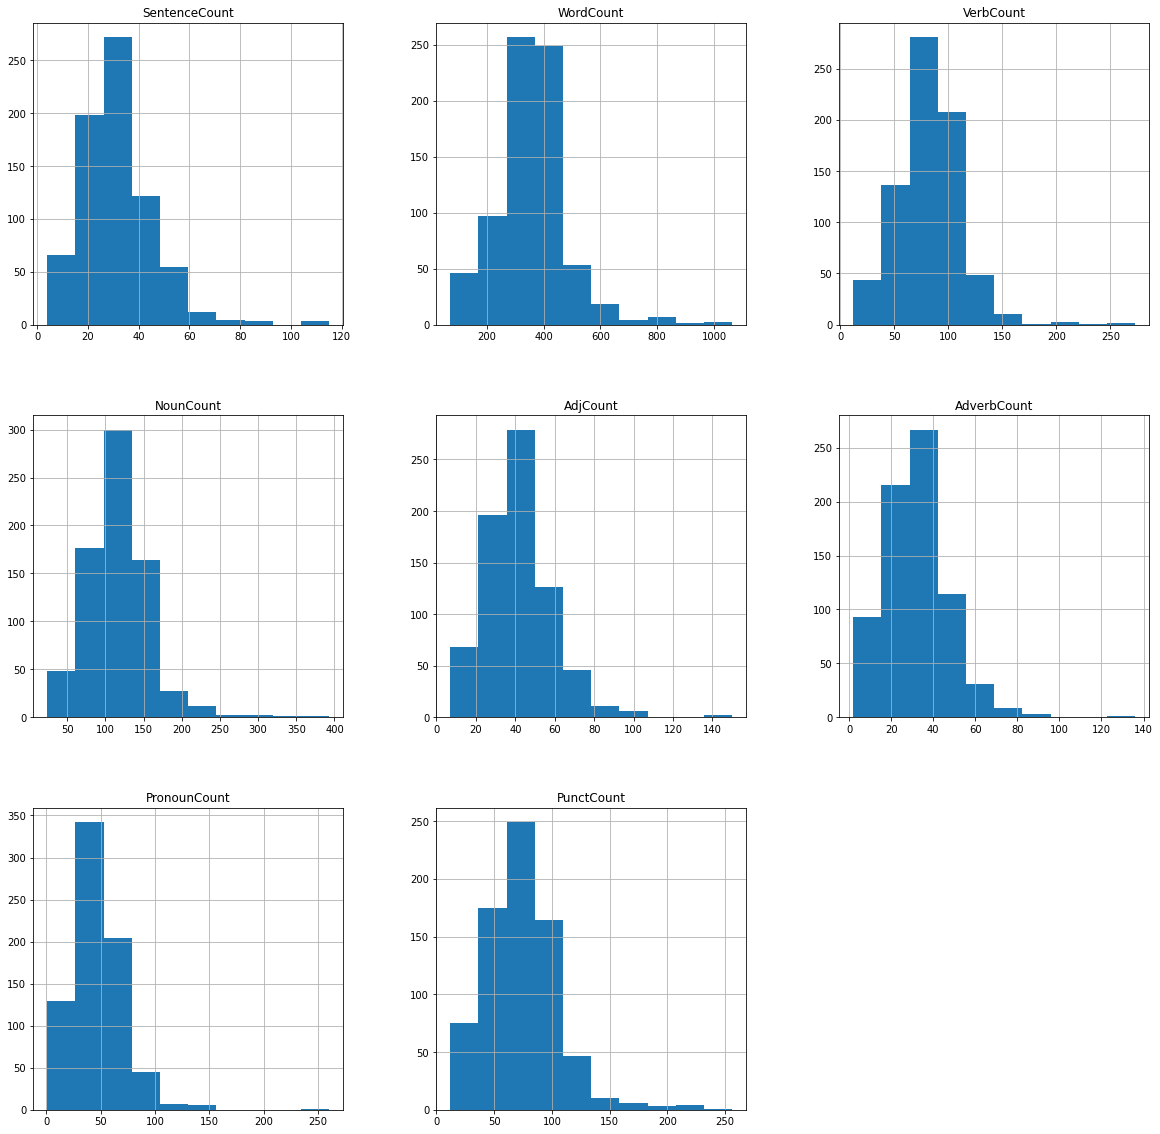

In [157]:
df_essays.hist(figsize=(20,20))